In [18]:
import pandas as pd
import numpy as np
import matplotlib as ptl

impData=pd.read_csv('online_shoppers_intention_1.csv')
impData.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [19]:
# droping the missing values only 6 rows with missing values
myData = impData.dropna(axis=0)

In [20]:
# propossing Administrative column into categorical
myData['Administrative'] = np.where(myData['Administrative'] > 3.0,3.0,myData['Administrative'])
myData['Administrative'] = myData['Administrative'].map({0.0:"Admin_zero",1.0:"Admin_First",2.0:"Admin_Second",3.0:"Admin_Third"})

# prepossing Administrative_Duration column into categorical
myData['Administrative_Duration'] = np.where(myData['Administrative_Duration'] != 0.0,1.0,myData['Administrative_Duration'])
myData['Administrative_Duration'] = myData['Administrative_Duration'].map({0.0:"Administrative_Duration_Zero",1.0:"Administrative_Duration_one"})

# prepossing Informational column into categorical
myData['Informational'] = np.where(myData['Informational'] >= 4.0,4.0,myData['Informational'])
myData['Informational'] = myData['Informational'].map({0.0:"Information_Zero",1.0:"Information_one",2.0:"Information_two",3.0:"Information_three",4.0:"Information_four"})

# prepossing OperatingSysyems column into String categorical
myData['OperatingSystems'] = np.where(myData['OperatingSystems'] >= 5,5,myData['OperatingSystems'])
myData['OperatingSystems'] = myData['OperatingSystems'].map({1:'OS1',2:'OS2',3:'OS3',4:'OS4',5:'OS5'})

# prepossing Weekend column into String categorical
myData['Weekend'] =  myData['Weekend'].map({True:'Weekend',False:'Weekdays'})


#preposing Revenue output column
myData['Revenue'] = myData['Revenue'].map({True:'Revenue_yes',False:'Revenue_no'})

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [21]:
myData.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,Admin_zero,Administrative_Duration_Zero,Information_Zero,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,OS1,1,1,1,Returning_Visitor,Weekdays,Revenue_no
1,Admin_zero,Administrative_Duration_Zero,Information_Zero,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,OS2,2,1,2,Returning_Visitor,Weekdays,Revenue_no
2,Admin_zero,Administrative_Duration_one,Information_Zero,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,OS4,1,9,3,Returning_Visitor,Weekdays,Revenue_no
3,Admin_zero,Administrative_Duration_Zero,Information_Zero,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,OS3,2,2,4,Returning_Visitor,Weekdays,Revenue_no
4,Admin_zero,Administrative_Duration_Zero,Information_Zero,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,OS3,3,1,4,Returning_Visitor,Weekend,Revenue_no


In [22]:
# selecting the feature to build the base model
new_myData = myData[['Month','OperatingSystems','VisitorType','Weekend','Revenue']]

In [24]:
# getting dependent and independent variables

x = new_myData
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)

y = myData['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12316, 4)
Shape of y: (12316,)


In [25]:
# splitting the data

from sklearn.model_selection import train_test_split

X_Train, X_Test, y_Train, y_Test = train_test_split(x, y, test_size = 0.3, random_state = 42,shuffle=True,stratify=y)

# checking the shapes

print("Shape of x_train :", X_Train.shape)
print("Shape of y_train :", y_Train.shape)
print("Shape of x_test :", X_Test.shape)
print("Shape of y_test :", y_Test.shape)

Shape of x_train : (8621, 4)
Shape of y_train : (8621,)
Shape of x_test : (3695, 4)
Shape of y_test : (3695,)


In [26]:
# concatinate the X_Train_Data as Morkov model as take complete dataframe as list
X_Train_data = pd.concat([X_Train,y_Train],axis=1)
# get the values
print('---------------------')
print('Use df.values property to get NumPy array')
vals = X_Train_data.values
print(vals)

# convert to list
print('---------------------')
print('Convert values to list')
X_Train_data_list = vals.tolist()

---------------------
Use df.values property to get NumPy array
[['Mar' 'OS2' 'Returning_Visitor' 'Weekdays' 'Revenue_no']
 ['Dec' 'OS1' 'Returning_Visitor' 'Weekend' 'Revenue_no']
 ['May' 'OS2' 'Returning_Visitor' 'Weekdays' 'Revenue_no']
 ...
 ['Mar' 'OS2' 'Returning_Visitor' 'Weekdays' 'Revenue_no']
 ['Nov' 'OS1' 'Returning_Visitor' 'Weekdays' 'Revenue_no']
 ['Oct' 'OS2' 'Returning_Visitor' 'Weekdays' 'Revenue_no']]
---------------------
Convert values to list


In [27]:
# import Markov chain click stream  model and buld the model
from markovclick.models import MarkovClickstream
m = MarkovClickstream(X_Train_data_list)

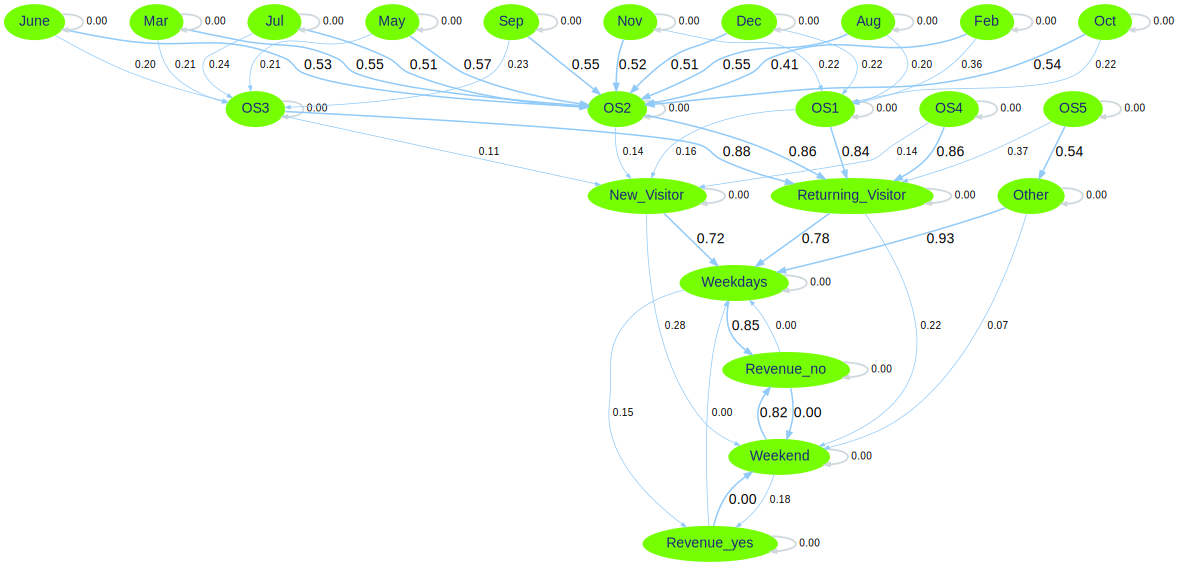

In [28]:
from markovclick.viz import visualise_markov_chain
graph = visualise_markov_chain(m)
graph

In [29]:
# get the test values
print('---------------------')
print('Use df.values property to get NumPy array')
testvals = X_Test.values
print(testvals)

# convert to list
print('---------------------')
print('Convert values to list')
X_Test_data_list = testvals.tolist()

---------------------
Use df.values property to get NumPy array
[['May' 'OS2' 'Returning_Visitor' 'Weekdays']
 ['May' 'OS2' 'Returning_Visitor' 'Weekdays']
 ['Dec' 'OS5' 'Other' 'Weekdays']
 ...
 ['Nov' 'OS1' 'New_Visitor' 'Weekend']
 ['Mar' 'OS2' 'New_Visitor' 'Weekend']
 ['May' 'OS3' 'Returning_Visitor' 'Weekdays']]
---------------------
Convert values to list


In [40]:
m.calc_prob_all_routes_to(X_Test_data_list[0],'Revenue_no',0) 

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 996.04it/s]


([['May', 'OS2', 'Returning_Visitor', 'Weekdays', 'Revenue_no']],
 [0.32194747571546295])

In [30]:
# create the list to store the pred_values
y_pred = []

# use the markov model to predict the probality of the output 
for i in range(0,len(X_Test_data_list)):
    y_test_pred_yes = m.calc_prob_all_routes_to(X_Test_data_list[i],'Revenue_yes',0) 
    y_test_pred_no = m.calc_prob_all_routes_to(X_Test_data_list[i],'Revenue_no',0) 
    if y_test_pred_yes[1][0] > y_test_pred_no[1][0]:
        y_pred.append('Revenue_yes')
    else:
        y_pred.append('Revenue_no')
        
y_pred_res = pd.Series(np.array(y_pred))

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 995.33it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1984.06it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 996.51it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 999.12it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1992.54it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 995.09it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2059.06it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 997.69it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 997.46it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 998.88it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2020.38it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 995.80it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1995.39it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 997.46it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1985.00it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2000.14it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 998.41it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1001.74it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 998.64it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 997.69it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 999.36it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1980.31it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1983.12it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 996.98it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1995.39it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1994.44it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1997.29it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1992.54it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 997.69it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 997.93it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1000.31it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2020.38it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 996.98it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 966.43it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 999.36it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 998.64it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 996.04it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1998.24it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 997.69it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 997.69it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 996.04it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1007.76it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 996.51it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


In [31]:
y_pred_res.value_counts()

Revenue_no    3695
dtype: int64